In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.distance import geodesic

In [ ]:
df = pd.read_csv('correlacao_go.csv')
estacoes_df = pd.read_csv('estacoes_go.csv')

estacoes_df = pd.read_csv('dist_estacoes.csv')


# Preparar uma lista para armazenar as distâncias calculadas
distancias = []

In [17]:
# Calcular a distância entre cada par de estações
for i, estacao_origem in estacoes_df.iterrows():
    for j, estacao_destino in estacoes_df.iterrows():
        if i != j:  # Evitar calcular a distância da estação para ela mesma e duplicatas
            # Coordenadas da estação de origem
            origem = (estacao_origem['latitude'], estacao_origem['longitude'])
            # Coordenadas da estação de destino
            destino = (estacao_destino['latitude'], estacao_destino['longitude'])
            # Calcular a distância e adicionar ao resultado
            distancia = geodesic(origem, destino).kilometers
            distancias.append({
                'cdg_estacao_origem': estacao_origem['cdg_estacao'],
                'cdg_estacao_destino': estacao_destino['cdg_estacao'],
                'distancia_km': distancia
            })

df_distancias = pd.DataFrame(distancias)


In [16]:
distancias_df

,cdg_estacao_origem,cdg_estacao_destino,distancia_km
0,A045,A024,162.300421
1,A045,A013,496.202091
2,A045,A001,38.604363
3,A045,A042,54.193509
4,A045,A023,472.973921
...,...,...,...
1855,A002,A017,416.783003
1856,A002,A025,224.553838
1857,A002,A031,439.637854
1858,A002,A011,297.889683


In [3]:
# Converter 'hr_medicao' para datetime e definir como índice do DataFrame
df['hr_medicao'] = pd.to_datetime(df['hr_medicao'])

# Pivotear o DataFrame para ter 'cdg_stacao' como colunas e 'tem_ins' como valores
df_pivoted = df.pivot(index='hr_medicao', columns='cdg_stacao', values='tem_ins')

In [4]:
df_pivoted

cdg_stacao,A001,A012,A036,A042,A045,A056
hr_medicao,,,,,,
2019-01-09 00:00:00,22.9,23.7,22.0,21.9,20.4,21.0
2019-01-09 01:00:00,22.1,23.3,21.3,20.9,19.6,20.4
2019-01-09 02:00:00,21.6,22.7,20.9,18.9,19.2,20.0
2019-01-09 03:00:00,21.1,21.9,20.7,19.0,18.4,19.3
2019-01-09 04:00:00,20.7,21.3,20.7,18.6,17.7,19.8
2019-01-09 05:00:00,20.0,21.1,20.4,18.3,16.8,18.8
2019-01-09 06:00:00,19.9,20.3,20.0,18.3,16.4,18.3
2019-01-09 07:00:00,19.2,20.2,19.7,17.9,14.9,18.0
2019-01-09 08:00:00,18.4,19.6,19.5,16.7,15.3,18.0


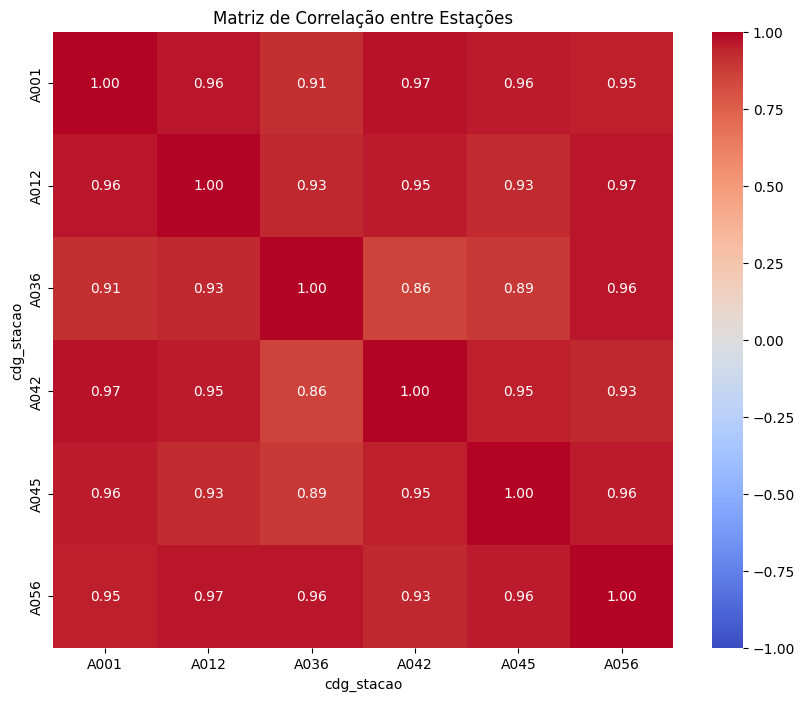

In [18]:
# Calcular a matriz de correlação
df_correlacao = df_pivoted.corr()

# Criar um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura
sns.heatmap(df_correlacao, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
# annot=True para mostrar os valores dentro do quadrado
# fmt=".2f" para formatar os números com duas casas decimais
# cmap='coolwarm' é uma escolha de paleta de cores, mas você pode escolher outras
# vmin e vmax definem os limites dos valores de cor, úteis para padronizar a escala de cores

plt.title('Matriz de Correlação entre Estações')
plt.show()


In [19]:
df_correlacao

cdg_stacao,A001,A012,A036,A042,A045,A056
cdg_stacao,,,,,,
A001,1.000000,0.963219,0.910801,0.971150,0.956450,0.952073
A012,0.963219,1.000000,0.934286,0.953207,0.928153,0.965516
A036,0.910801,0.934286,1.000000,0.856279,0.885091,0.963354
A042,0.971150,0.953207,0.856279,1.000000,0.950992,0.930502
A045,0.956450,0.928153,0.885091,0.950992,1.000000,0.958421
A056,0.952073,0.965516,0.963354,0.930502,0.958421,1.000000


0.96
52.32km
0.91
115.13km
0.97
30.41km
0.96
38.60km
0.95
74.74km
0.96
52.32km
0.93
69.25km
0.95
75.21km
0.93
82.06km
0.97
39.56km
0.91
115.13km
0.93
69.25km
0.86
142.38km
0.89
131.53km
0.96
42.69km
0.97
30.41km
0.95
75.21km
0.86
142.38km
0.95
54.19km
0.93
103.71km
0.96
38.60km
0.93
82.06km
0.89
131.53km
0.95
54.19km
0.96
88.85km
0.95
74.74km
0.97
39.56km
0.96
42.69km
0.93
103.71km
0.96
88.85km


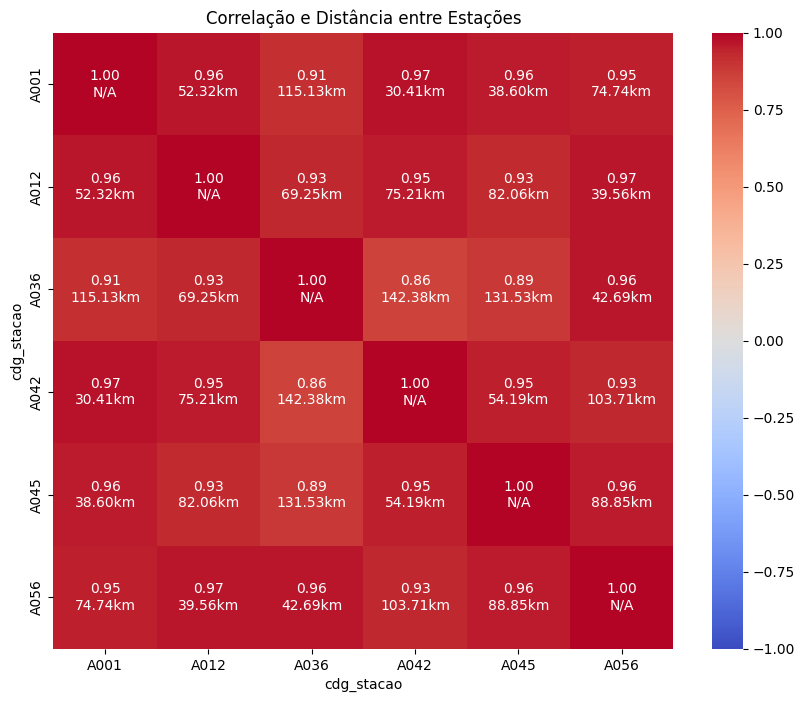

In [26]:


# Suponha que 'df_correlacao' seja a sua matriz de correlação e 'df_distancias' seja o DataFrame com as distâncias
# df_correlacao = ... (já calculado anteriormente)
# df_distancias = pd.DataFrame({'cdg_estacao_origem': [...], 'cdg_estacao_destino': [...], 'distancia_km': [...]})

# Cria um DataFrame para armazenar os textos de anotação que incluirão correlação e distância
anotacoes = pd.DataFrame(index=df_correlacao.index, columns=df_correlacao.columns, dtype='object')

for origem in df_correlacao.index:
    for destino in df_correlacao.columns:
        correlacao = df_correlacao.loc[origem, destino]
        # Buscar a distância correspondente
        distancia = df_distancias[(df_distancias['cdg_estacao_origem'] == origem) & (df_distancias['cdg_estacao_destino'] == destino)]['distancia_km'].values
        
        if distancia.size > 0:  # Se encontrou a distância
            texto_anotacao = f"{correlacao:.2f}\n{distancia[0]:.2f}km"
            print(texto_anotacao)
        else:
            texto_anotacao = f"{correlacao:.2f}\nN/A"
        anotacoes.loc[origem, destino] = texto_anotacao

# Agora, criar o heatmap usando as anotações personalizadas
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacao, annot=anotacoes.values, fmt="", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação e Distância entre Estações')
plt.show()
